In [58]:
import pandas as pd
import seaborn as sns
%pylab inline
sns.set()
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

Populating the interactive namespace from numpy and matplotlib


In [45]:
import scipy as sc
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2

In [2]:
sdo_table = pd.read_excel('Таблица для заполнения.xlsx', sheet_name='СДО_Я', index_col=0)
sdo_sup_table = pd.read_excel('Таблица для заполнения.xlsx', sheet_name='СДО_СУП',index_col=0)
sdo_snup_table = pd.read_excel('Таблица для заполнения.xlsx', sheet_name='СДО_СНУП',index_col=0)
usk_table = pd.read_excel('Таблица для заполнения.xlsx', sheet_name='УСК',index_col=0)
pf_table = pd.read_excel('Таблица для заполнения.xlsx', sheet_name='16PF',index_col=0)
dynamic_tabel = pd.read_excel('Таблица для заполнения.xlsx', sheet_name='Анкета_Брак_динамика',index_col=0)

## Таблица - Динамика

In [3]:
dynamic_tabel = dynamic_tabel.drop([234,231])

In [4]:
text_columns = ['Должность','МЖ','ДолжОтца','ДолжМат']
categorial_columns = ['Пол','БракРанее','БракГражРанее','Брак','БракГраж','РожПолн','ВоспПолн']
real_columns = ['Возраст','СтажРаб','СтажУпр','СтажСем','СтажСовок','Дети']
quantitative_columns = dynamic_tabel.drop(columns=text_columns+categorial_columns+real_columns).columns.tolist()

### Обработка должностей

In [5]:
dynamic_tabel[text_columns] = dynamic_tabel[text_columns].applymap(lambda string: string.strip().lower())

##  Таблица - 16PF

In [6]:
pf_table = pf_table.drop(144)

## Таблица - УСК 

In [44]:
usk_table = usk_table.dropna()

## Таблица - СДО

In [7]:
sdo_table['ФИО'] = sdo_table['ФИО'].fillna('noname')

### Пример анализа

In [57]:
married = dynamic_tabel[(dynamic_tabel['Брак'] == 1) | (dynamic_tabel['БракГраж'] == 1)]

In [59]:
list_years = [1,2,3,4,5,10,15,20,25,30,35,40,45,50]
x = []
for i, n in married['СтажСем'].iteritems():
    for j, year in enumerate(list_years):
        if n < year:
            x.append(married.loc[i,f'УдовСемья{list_years[j-1]}'])
            break
married['УдовСемьяСейчас'] = x
married['УдовСемьяСейчас'] = married['УдовСемьяСейчас'].fillna(int(married['УдовСемьяСейчас'].mean()))

/home/vadim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/vadim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [62]:
y = married['УдовСемьяСейчас'].drop(144)

In [81]:
X = dynamic_tabel[['Возраст', 'Дети', 'РожПолн', 'ВоспПолн']].loc[y.index, :]

In [82]:
data = X.copy()
data['y'] = y.copy()

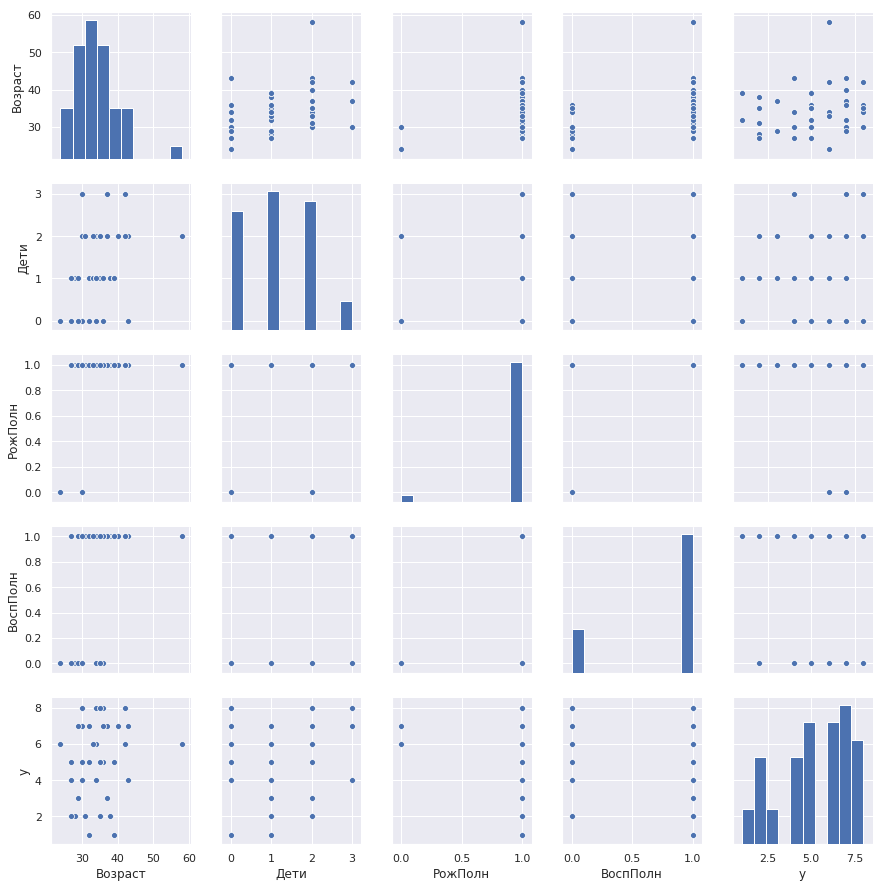

In [83]:
sns.pairplot(data)

In [84]:
m1 = smf.ols('y ~ ' + ' + '.join(data.columns[:-1]), 
             data=data)
fitted = m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.164
Date:                Wed, 09 Jan 2019   Prob (F-statistic):              0.343
Time:                        22:43:51   Log-Likelihood:                -87.793
No. Observations:                  42   AIC:                             185.6
Df Residuals:                      37   BIC:                             194.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0087      2.189      1.831      0.0

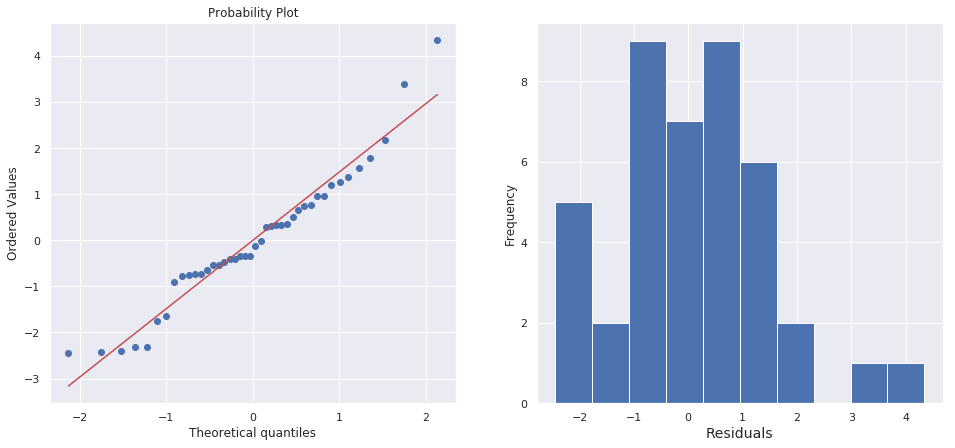

In [68]:
plt.figure(figsize(16,7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=pylab)
plt.subplot(122)
fitted.resid.plot.hist()
plt.xlabel('Residuals', fontsize=14)
pylab.show()

In [69]:
print('Breusch-Pagan test: p=%f' % sms.het_breushpagan(fitted.resid, fitted.model.exog)[1])

Breusch-Pagan test: p=0.246099


/home/vadim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  """Entry point for launching an IPython kernel.


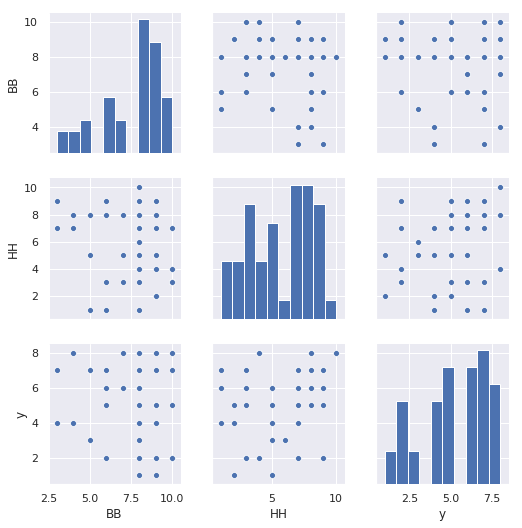

In [71]:
sns.pairplot(data[['BB','HH','y']])

In [74]:
m1 = smf.ols('y ~ BB + HH', 
             data=data)
fitted = m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     1.917
Date:                Wed, 09 Jan 2019   Prob (F-statistic):              0.161
Time:                        22:39:21   Log-Likelihood:                -88.311
No. Observations:                  42   AIC:                             182.6
Df Residuals:                      39   BIC:                             187.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9576      1.633      3.035      0.0

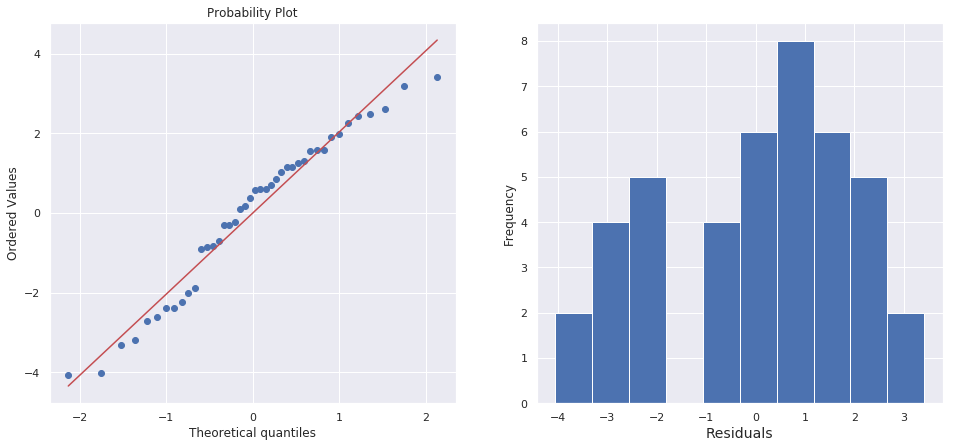

In [75]:
plt.figure(figsize(16,7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=pylab)
plt.subplot(122)
fitted.resid.plot.hist()
plt.xlabel('Residuals', fontsize=14)
pylab.show()